In [1]:
drugs1 =["D00319", "D00437", "D00618", "D00629", 
         "D01145", "D01173", "D00383", "D01900"]

activities1 = [1, 1, 1, 1, 1, 1, 0, 0]

drugs2 =["D01908", "D01562", "D00251", "D00421"]

activities2 = [1, 1, 0, 0]

In [2]:
import urllib
for id in drugs1:
   url = "http://www.kegg.jp/dbget-bin/www_bget?-f+m+drug+{0}".format(id)
   fn = "{0}.mol".format(id)
   urllib.urlretrieve(url,"{0}".format(fn))

for id in drugs2:
   url = "http://www.kegg.jp/dbget-bin/www_bget?-f+m+drug+{0}".format(id)
   fn = "{0}.mol".format(id)
   urllib.urlretrieve(url,"{0}".format(fn))

In [3]:
from rdkit import Chem
ms1 = [Chem.MolFromMolFile("{0}.mol".format(id)) for id in drugs1]
ms2 = [Chem.MolFromMolFile("{0}.mol".format(id)) for id in drugs2]

In [4]:
from rdkit.Chem import AllChem
for m in ms1: tmp=AllChem.Compute2DCoords(m)
for m in ms2: tmp=AllChem.Compute2DCoords(m)

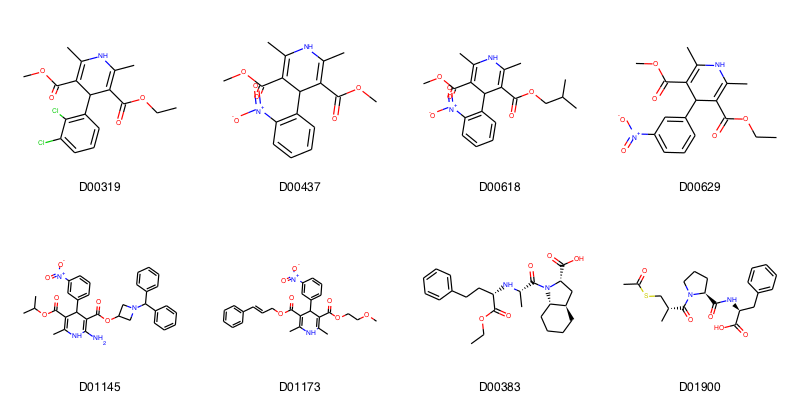

In [5]:
from IPython.display import Image
from rdkit.Chem import Draw
img=Draw.MolsToGridImage(ms1,molsPerRow=4,subImgSize=(200,200), legends=drugs1)
img.save('drugs1grid.png')
Image(filename="drugs1grid.png")

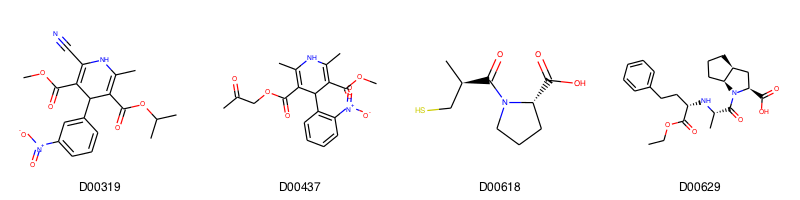

In [6]:
from IPython.display import Image
img=Draw.MolsToGridImage(ms2,molsPerRow=4,subImgSize=(200,200), legends=drugs1)
img.save('drugs2grid.png')
Image(filename="drugs2grid.png")

In [7]:
# TPSA = Topological Polar Surface Area
# LogP : 分配係数
from rdkit.Chem import Descriptors
for id, m in zip(drugs1, ms1):
    print (id, Descriptors.TPSA(m), Descriptors.MolLogP(m))

('D00319', 64.63, 3.9643000000000024)
('D00437', 107.77000000000001, 2.1756)
('D00618', 107.77000000000001, 3.201800000000002)
('D00629', 107.77000000000001, 2.5657000000000005)
('D01145', 137.03, 4.694500000000003)
('D01173', 117.00000000000003, 4.275800000000004)
('D00383', 95.94, 2.7733000000000008)
('D01900', 103.78, 1.7052999999999998)


In [8]:
from rdkit import Chem, DataStructs
import numpy
fps = [AllChem.GetMorganFingerprintAsBitVect(m, 2) for m in ms1]
np_fps = [] 
for fp in fps:
  arr = numpy.zeros((1,))
  DataStructs.ConvertToNumpyArray(fp, arr)
  np_fps.append(arr)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1123)

In [10]:
rf.fit(np_fps, activities1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1123, verbose=0,
            warm_start=False)

In [11]:
prediction_results = []
prediction_probabilities = []
for m in ms2:
    fp = numpy.zeros((1,))
    DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(m, 2), fp)
    prediction_results.append(rf.predict(fp))
    prediction_probabilities.append(rf.predict_proba(fp))

/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/anaconda/lib

In [12]:
prediction_results

[array([1]), array([1]), array([0]), array([0])]

In [13]:
prediction_probabilities

[array([[ 0.08,  0.92]]),
 array([[ 0.02,  0.98]]),
 array([[ 0.63,  0.37]]),
 array([[ 0.84,  0.16]])]